# Hackathon Brazil Housing

###### 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import squarify

In [2]:
import warnings
warnings.filterwarnings("ignore")

###### 

Reading the Brazil housing data for analysis.

In [3]:
data = pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv")

#### 

### Business Objectives :

Companies allowing work-from-home facilities for 40% of employees want to relocate to cities that support remote living and work.

1) Select the suitable cities for relocating bachelors.

2) Select the suitable cities for relocating mid-size families.

3) Select the suitable cities for relocating large-size families.

###### 

## Understanding the data.

###### 

###### Checking number of rows and columns in data.

In [4]:
data.shape

(10692, 13)

###### 

Reading first 5 rows of data.

In [5]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


###### 

Reading last 5 rows of the data.

In [6]:
data.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


###### 

Information about data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


###### 

Count of null records in data.

In [8]:
a = data.isnull().sum()

In [9]:
a[a!=0].count()

0

###### 

Checking data type of each column

In [10]:
data.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

###### 

Column Names

In [11]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

###### 

Number of unique values in each column.

In [12]:
data.nunique()

city                      5
area                    517
rooms                    11
bathroom                 10
parking spaces           11
floor                    35
animal                    2
furniture                 2
hoa (R$)               1679
rent amount (R$)       1195
property tax (R$)      1243
fire insurance (R$)     216
total (R$)             5751
dtype: int64

###### 

## Univariate, Bivariate analysis & Multivariate Analysis.

Defining function to identified the Categorical and numerical columns.

In [13]:
data["city"].dtype

dtype('O')

In [14]:
def dtypes_col(data):
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].nunique() >= 20:
            numerical.append(i)
        else:
            categorical.append(i)
            
    return categorical, numerical

categorical, numerical = dtypes_col(data)

In [15]:
print(tabulate({"Categorical":categorical,
                "Numerical": numerical}, headers = ["Categorical", "Numerical"],tablefmt='fancy_grid'))

╒════════════════╤═════════════════════╕
│ Categorical    │ Numerical           │
╞════════════════╪═════════════════════╡
│ city           │ area                │
├────────────────┼─────────────────────┤
│ rooms          │ floor               │
├────────────────┼─────────────────────┤
│ bathroom       │ hoa (R$)            │
├────────────────┼─────────────────────┤
│ parking spaces │ rent amount (R$)    │
├────────────────┼─────────────────────┤
│ animal         │ property tax (R$)   │
├────────────────┼─────────────────────┤
│ furniture      │ fire insurance (R$) │
├────────────────┼─────────────────────┤
│                │ total (R$)          │
╘════════════════╧═════════════════════╛


###### 

In [16]:
def cat_info(a):
    if data[a].isnull().sum() > 0:
        mode_value = data[a].mode()[0]
        data[a].fillna(mode_value, inplace=True)

    print(f"The number of categories in {a} : {data[a].nunique()}")
    print(f"The mode of {a} : {data[a].mode()[0]}")
    print(f"Missing values in {a} are : {data[a].isnull().sum()}")

In [17]:
cat_info("city")

The number of categories in city : 5
The mode of city : São Paulo
Missing values in city are : 0


In [18]:
cat_info("rooms")

The number of categories in rooms : 11
The mode of rooms : 3
Missing values in rooms are : 0


In [19]:
cat_info("bathroom")

The number of categories in bathroom : 10
The mode of bathroom : 1
Missing values in bathroom are : 0


In [20]:
cat_info("parking spaces")

The number of categories in parking spaces : 11
The mode of parking spaces : 1
Missing values in parking spaces are : 0


In [21]:
cat_info("animal")

The number of categories in animal : 2
The mode of animal : acept
Missing values in animal are : 0


In [22]:
cat_info("furniture")

The number of categories in furniture : 2
The mode of furniture : not furnished
Missing values in furniture are : 0


###### 

In [23]:
def num_info(s):
    if data[s].isnull().sum() > 0:
        mean_value = data[s].mean()
        data[s].fillna(mean_value, inplace=True)

    print(f"The mean of {s} : {data[s].mean()} ")
    print(f"The median is {s} : {data[s].median()}")
    print(f"The Standard devivation of {s} : {data[s].std()}")
    print(f"Missing values in {s} are : {data[s].isnull().sum()}")
    print(f"The skewness of {s} : {data[s].skew()}")

In [24]:
num_info("area")

The mean of area : 149.21791994014217 
The median is area : 90.0
The Standard devivation of area : 537.0169423364867
Missing values in area are : 0
The skewness of area : 69.5968036883111


In [25]:
num_info("floor")

The mean of floor : 5.0679947624392065 
The median is floor : 3.0
The Standard devivation of floor : 6.069050243218268
Missing values in floor are : 0
The skewness of floor : 11.816996675729374


In [26]:
num_info("hoa (R$)")

The mean of hoa (R$) : 1174.0216984661429 
The median is hoa (R$) : 560.0
The Standard devivation of hoa (R$) : 15592.305248403356
Missing values in hoa (R$) are : 0
The skewness of hoa (R$) : 69.03938118910439


In [27]:
num_info("rent amount (R$)")

The mean of rent amount (R$) : 3896.247194163861 
The median is rent amount (R$) : 2661.0
The Standard devivation of rent amount (R$) : 3408.5455176710816
Missing values in rent amount (R$) are : 0
The skewness of rent amount (R$) : 1.8388773035440982


In [28]:
num_info("property tax (R$)")

The mean of property tax (R$) : 366.70435839880287 
The median is property tax (R$) : 125.0
The Standard devivation of property tax (R$) : 3107.832321161917
Missing values in property tax (R$) are : 0
The skewness of property tax (R$) : 96.01359410694417


In [29]:
num_info("fire insurance (R$)")

The mean of fire insurance (R$) : 53.300879161990274 
The median is fire insurance (R$) : 36.0
The Standard devivation of fire insurance (R$) : 47.768030930197206
Missing values in fire insurance (R$) are : 0
The skewness of fire insurance (R$) : 1.9703997562081081


In [30]:
num_info("total (R$)")

The mean of total (R$) : 5490.4869996258885 
The median is total (R$) : 3581.5
The Standard devivation of total (R$) : 16484.72591235027
Missing values in total (R$) are : 0
The skewness of total (R$) : 58.96080291866255


###### 

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###### 

### Rio De Janeiro and Sao Paulo are among the most expensive cities to live in Brazil, People from this cities are considering relocating to the different cities.

In [31]:
a = ["São Paulo","Rio de Janeiro"]

In [32]:
data.drop(data[data["city"].isin(a)].index, inplace=True)

#### Determine the number of houses in each city.

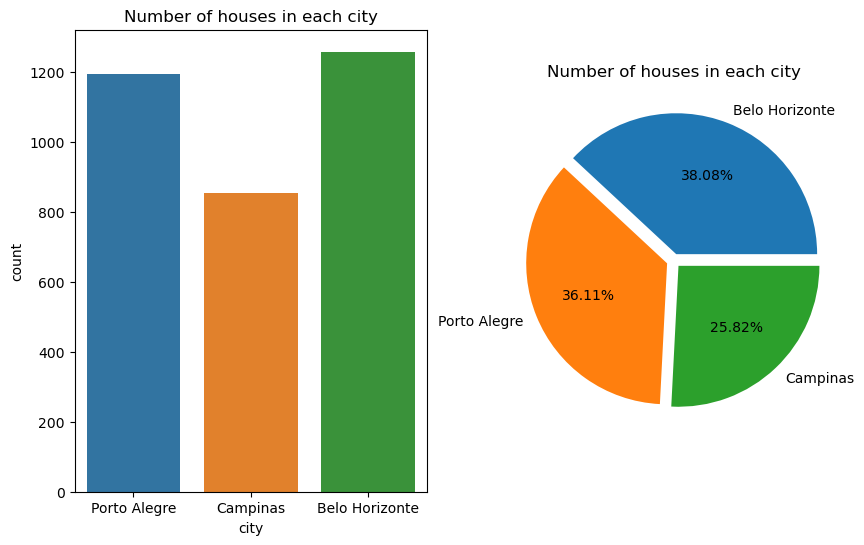

In [58]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].set_title("Number of houses in each city") 
ax[1].set_title("Number of houses in each city")  
percentage = data["city"].value_counts()         
labels = (data["city"].value_counts().index).to_list()
sns.countplot(x = data["city"], ax = ax[0])
plt.pie(percentage,labels = labels,explode = [0.05, 0.05, 0.05], autopct= "%0.2f%%")
plt.show()

### Interpretation : 38.08% of houses are in Belo Horizonte city, 36.11% houses are in Porto Alegre and 25.82% are in Campinas city.

###### 

#### Numbers of rooms in each city.

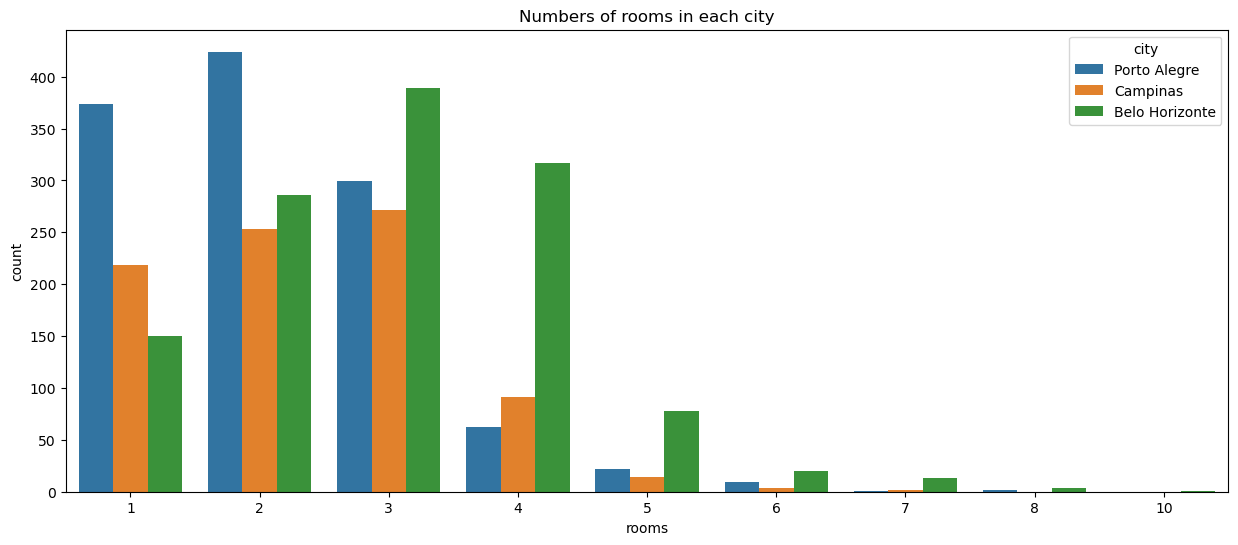

In [34]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.set_title("Numbers of rooms in each city")
sns.countplot(x = "rooms", hue = "city", data = data)
plt.show()

### ***Interpretation : The maximum number of houses in Porto Alegre city.

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Note : 

### The total amount is the sum of property tax, HOA fees, fire insurance, and rent. However, property tax, HOA fees, and fire insurance are covered by the landlord. Therefore, we are only considering the rent amount for operations.

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Select the suitable cities for relocating bachelors.

### Considering some of the house requirements for Bachelors in different cities :

1) Rooms: 1

2) Bathrooms: 1

3) Furnished Interior

4) Parking Spaces: No parking

###### 

#### City : Porto Alegre

In [64]:
B1 = data[(data["rooms"]==1) & (data["bathroom"]==1) & (data["furniture"]=="furnished") & (data["parking spaces"]==0)
          & (data["city"]=="Porto Alegre")]

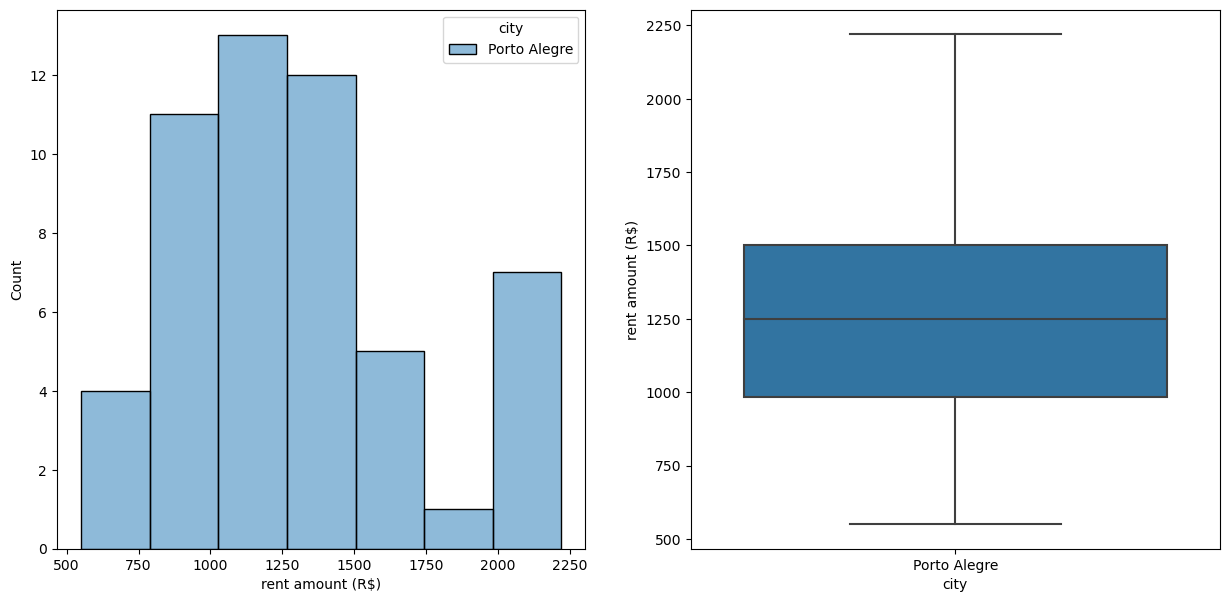

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = B1["rent amount (R$)"], hue = B1["city"], ax = ax[0])
sns.boxplot(x = B1["city"] ,y = B1["rent amount (R$)"] , ax = ax[1])
plt.show()

### Interpretation : Porto Alegre is a budget-friendly city for relocating bachelors.

###### 

#### City : Campinas

In [66]:
B2 = data[(data["rooms"]==1) & (data["bathroom"]==1) & (data["furniture"]=="furnished") & (data["parking spaces"]==0) 
          & (data["city"]=="Campinas")]

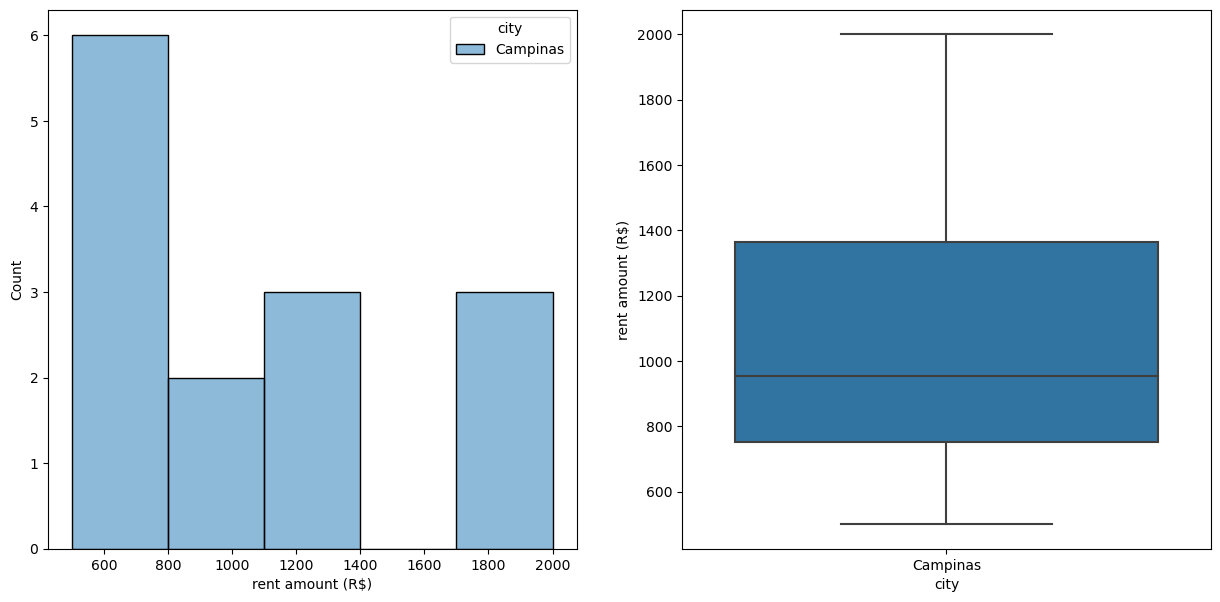

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = B2["rent amount (R$)"], hue = B2["city"], ax = ax[0])
sns.boxplot(x = B2["city"] ,y = B2["rent amount (R$)"] , ax = ax[1])
plt.show()

### Interpretation : Campinas is a budget-friendly city for relocating bachelors, and there are few houses available.

###### 

#### City : Belo Horizonte

In [39]:
B3 = data[(data["rooms"]==1) & (data["bathroom"]==1) & (data["furniture"]=="furnished") & (data["parking spaces"]==0) 
          & (data["city"]=="Belo Horizonte")]

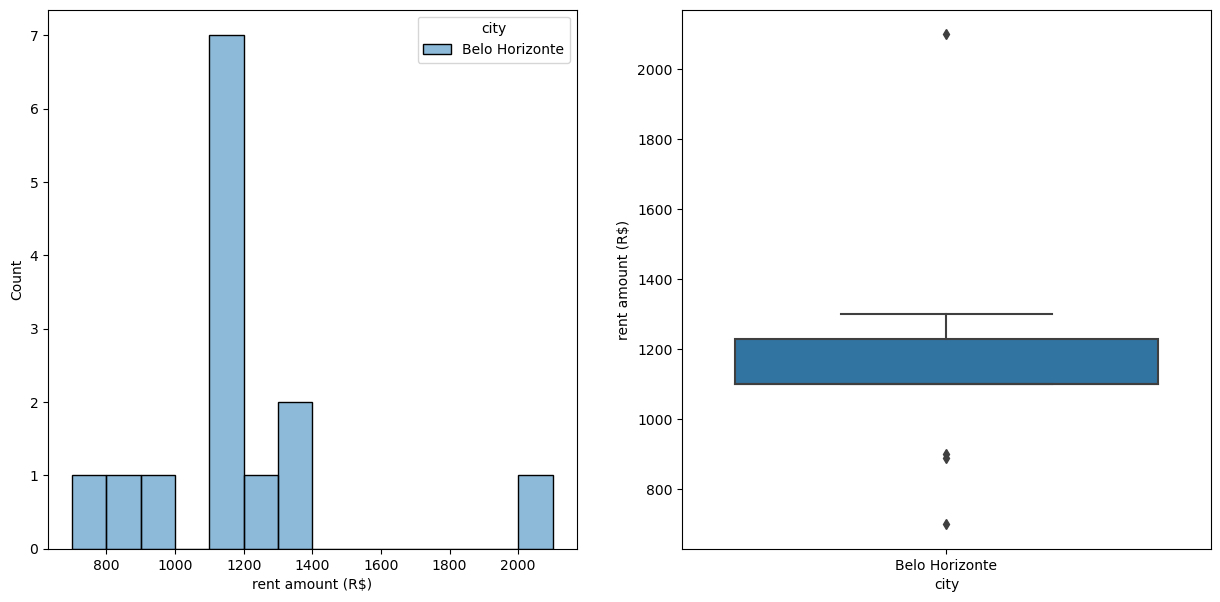

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = B3["rent amount (R$)"], hue = B3["city"], ax = ax[0])
sns.boxplot(x = B3["city"] ,y = B3["rent amount (R$)"] , ax = ax[1])
plt.show()

### Interpretation : Belo Horizonte is a budget-friendly city for relocating bachelors.

###### 

### Interpretation : 

1) The budget for suitable houses in Porto Alegre for bachelors is 750 to 1500.

2) The budget for suitable houses in Campinas for bachelors is 600 to 1400.

3) The budget for suitable houses in Belo Horizonte for bachelors is 800 to 1400.


### The majority of available houses are in Porto Alegre city, and some houses are also available in Campinas city

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Select the suitable cities for relocating mid-size families.

### Considering some of the house requirements for midsize families in different cities :

1) Rooms: 2 or 3

2) Bathrooms: 2

3) Furnished Interior

4) Parking Spaces: 1

###### 

Numbers of rooms in house is 2 or 3

In [41]:
data_1 = data[(data["rooms"]==2) | (data["rooms"]==3)]

#### City : Porto Alegre

In [70]:
M1 = data_1[(data_1["furniture"] == "furnished") & (data_1["parking spaces"] == 1) & 
          (data_1["city"] == "Porto Alegre") & (data_1["bathroom"]==2)]

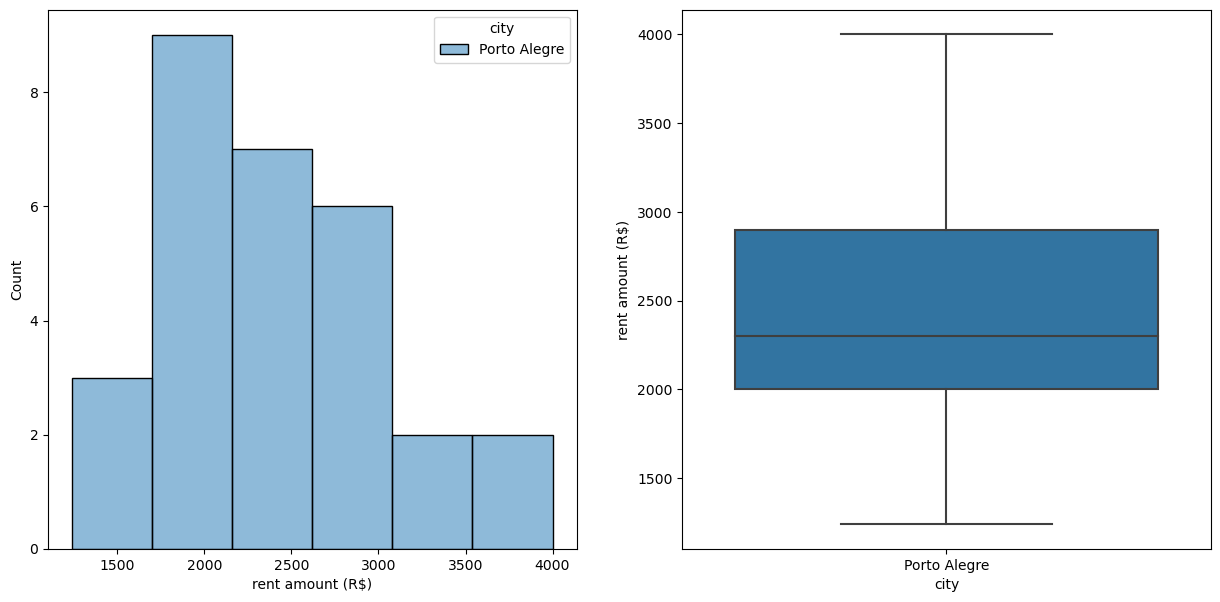

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = M1["rent amount (R$)"], hue = M1["city"], ax = ax[0])
sns.boxplot(x = M1["city"] ,y = M1["rent amount (R$)"] , ax = ax[1])
plt.show()

### Interpretation : Porto Alegre is a budget-friendly city for relocating mid-size families.

###### 

#### City : Campinas

In [44]:
M2 = data_1[(data_1["furniture"] == "furnished") & (data_1["parking spaces"] == 1) & 
          (data_1["city"] == "Campinas") & (data_1["bathroom"]==2)]

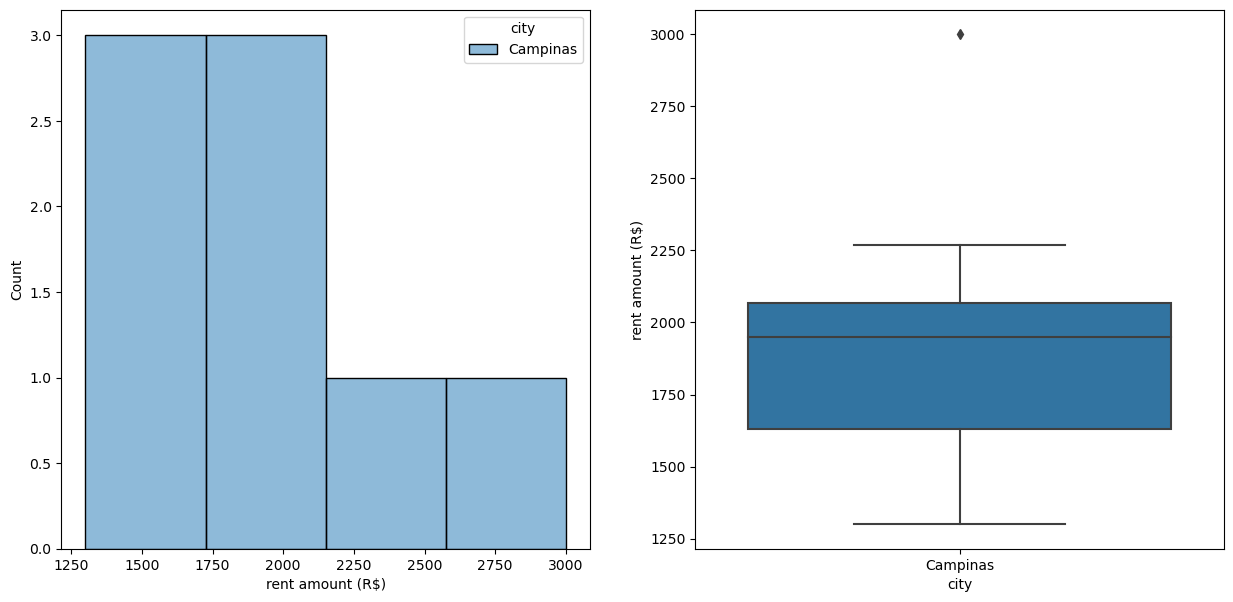

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = M2["rent amount (R$)"], hue = M2["city"], ax = ax[0])
sns.boxplot(x = M2["city"] ,y = M2["rent amount (R$)"] , ax = ax[1])
plt.show()

### Interpretation : Campinas is a low-budget city for relocating mid-size families, but there are very few houses available.

###### 

#### City : Belo Horizonte

In [46]:
M3 = data_1[(data_1["furniture"] == "furnished") & (data_1["parking spaces"] == 1) & 
          (data_1["city"] == "Belo Horizonte") & (data_1["bathroom"]==2)]

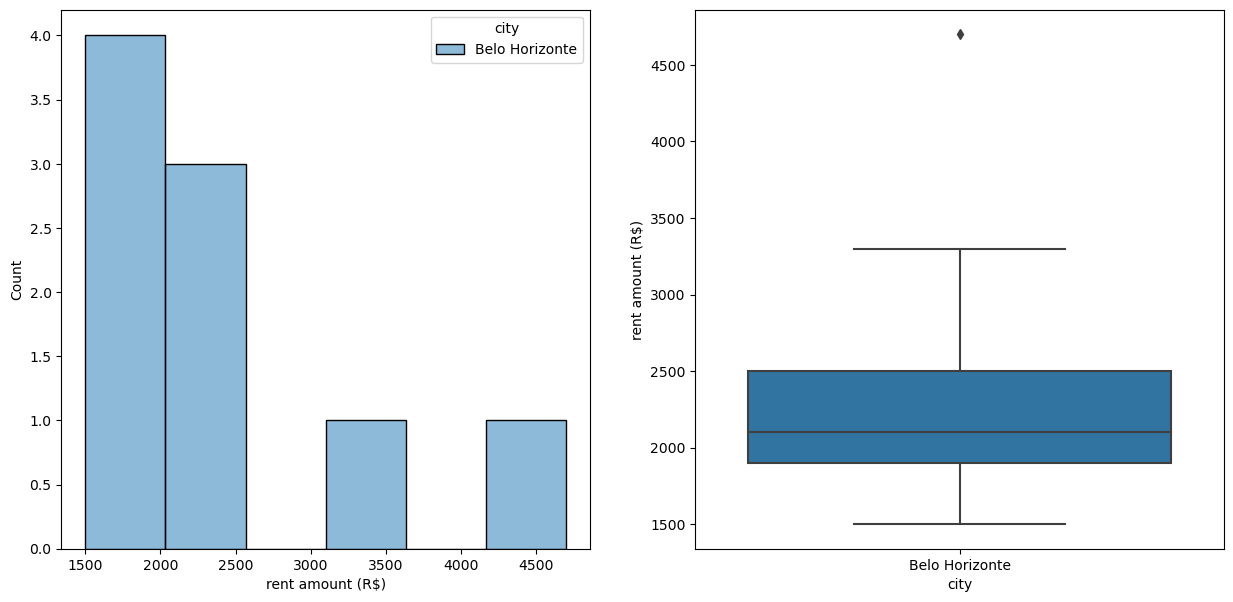

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = M3["rent amount (R$)"], hue = M3["city"], ax = ax[0])
sns.boxplot(x = M3["city"] ,y = M3["rent amount (R$)"] , ax = ax[1])
plt.show()

### Interpretation : Belo Horizonte is a budget-friendly city for relocating mid-size families, but there are very few houses available for rent.

###### 

### Interpretation : 

1) The budget for suitable houses in Porto Alegre for Mid-size families is 2500 to 4500.

2) The budget for suitable houses in Campinas for Mid-size families is 1600 to 3400.

3) The budget for suitable houses in Belo Horizonte for Mid-size families is 1500 to 4500.


### The majority of available houses for Mid-size families is in Porto Alegre city.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Select the suitable cities for relocating large-size families. 

###  Considering the house requirements for large-size families in different cities :

1) Rooms: More than 3

2) Bathrooms: More than 2

3) Furnished Interior

4) Parking Spaces: 2 and more

5) Animal will be accepted

###### 

#### Porto Alegre

In [74]:
L1 = data[(data["rooms"] > 3) & (data["bathroom"] > 2) & (data["furniture"]=="furnished") & (data["parking spaces"] >=2)
          & (data["city"]=="Porto Alegre") & (data["animal"]=="acept")]

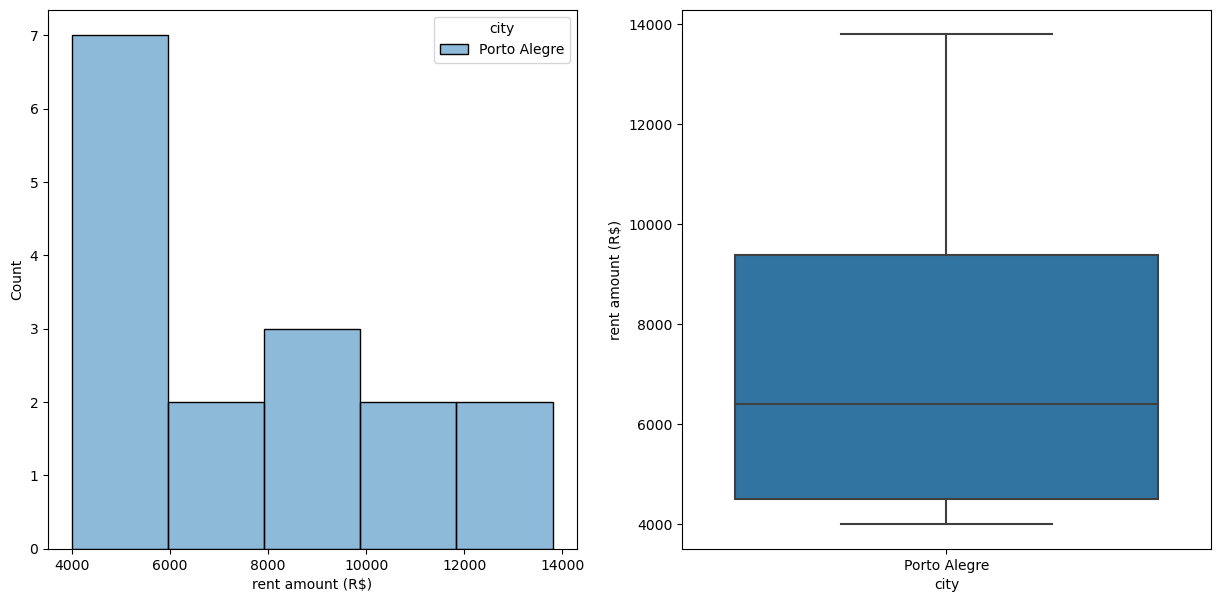

In [75]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = L1["rent amount (R$)"], hue = L1["city"], ax = ax[0])
sns.boxplot(x = L1["city"] ,y = L1["rent amount (R$)"] , ax = ax[1])
plt.show()

### Interpretation :  There are few houses available in Porto Alegre for relocating large-size families at a lower rental price.

###### 

#### Campinas

In [50]:
L2 = data[(data["rooms"] > 3) & (data["bathroom"] > 2) & (data["furniture"]=="furnished") & (data["parking spaces"] >=2)
          & (data["city"]=="Campinas") & (data["animal"]=="acept")]

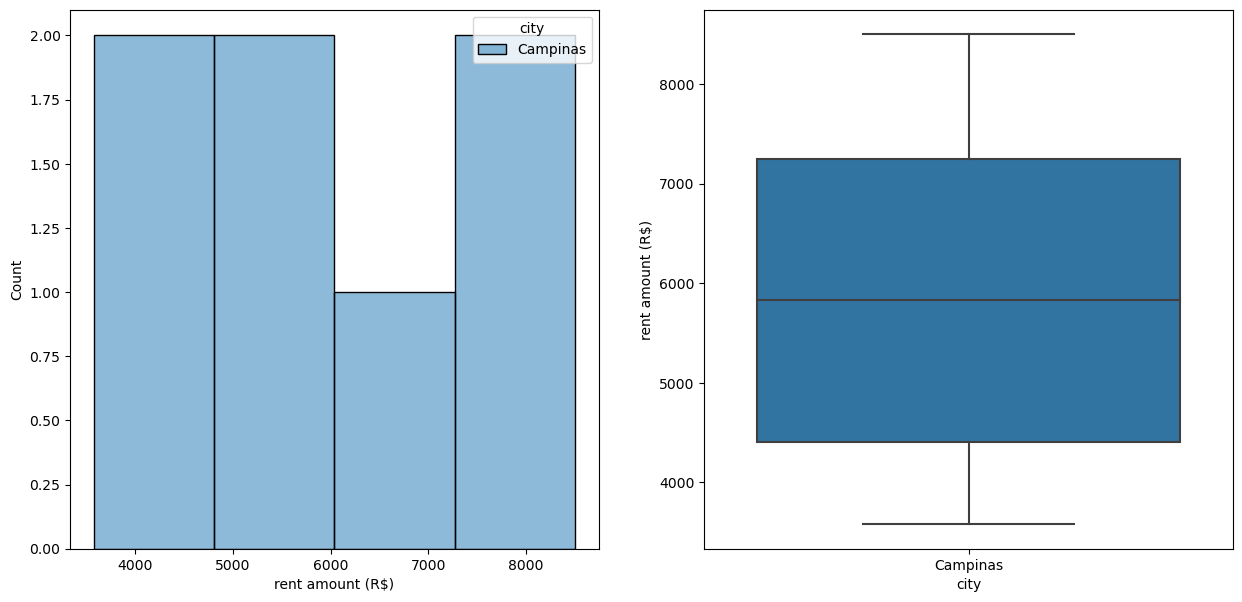

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = L2["rent amount (R$)"], hue = L2["city"], ax = ax[0])
sns.boxplot(x = L2["city"] ,y = L2["rent amount (R$)"] , ax = ax[1])
plt.show()

### Interpretation : Campinas is a budget-friendly city for large-size families to relocate, but there are very few houses available for rent.

###### 

#### Belo Horizonte

In [52]:
L3 = data[(data["rooms"] > 3) & (data["bathroom"] > 2) & (data["furniture"]=="furnished") & (data["parking spaces"] >=2)
          & (data["city"]=="Belo Horizonte") & (data["animal"]=="acept")]

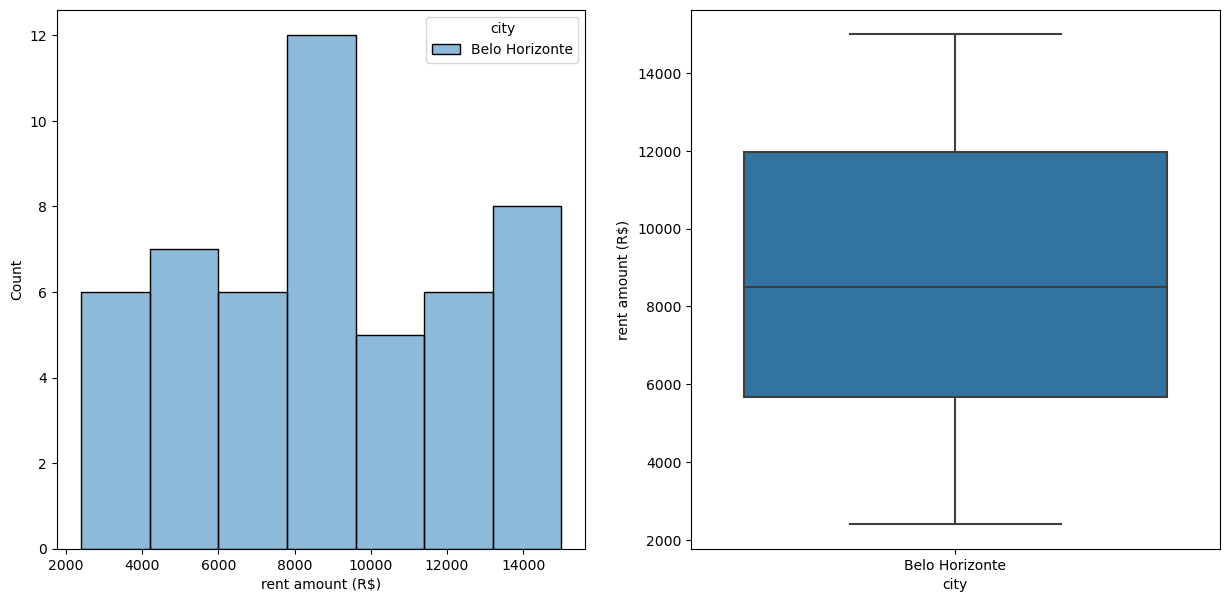

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = L3["rent amount (R$)"], hue = L3["city"], ax = ax[0])
sns.boxplot(x = L3["city"] ,y = L3["rent amount (R$)"] , ax = ax[1])
plt.show()

### Interpretation : Belo Horizonte is a good city for relocating large-size families, and the budget is also not excessively high.

###### 

### Interpretation : 

1) The budget for suitable houses in Porto Alegre for Large-size families is 4000 to 14000.

2) The budget for suitable houses in Campinas for Large-size families is 4000 to 8000.

3) The budget for suitable houses in Belo Horizonte for Large-size families is 3000 to 14000.


### The majority of available houses for Large-size families is in Belo Horizonte city.

#### 

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Recommendation : 

 1) Porto Alegre is a budget-friendly city for relocating bachelors and mid-size families. Belo Horizonte is also a good choice for bachelors, but the number of available houses for rent is very low there.





 2) Belo Horizonte and Campinas are good and budget-friendly choices for relocating mid-size families, although there is a limited availability of houses for rent. Porto Alegre is also a favorable option for relocating mid-size families.





 3) Belo Horizonte is a good choice for relocating large-size families. Campinas and Porto Alegre are also budget-friendly cities, but there is a limited availability of houses for rent.

###### 